<a href="https://colab.research.google.com/github/Venettov/Riveraruiz_GIS/blob/main/PS1_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install geopandas==1.0.1
!pip install mapclassify


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 1.5 MB/s eta 0:00:00


I want to collect population data from Puerto Rico, the place where I was born and raised. The island has faced natural disasters, corruption, mismanagement by local government, and mass emigration that has resulted in a critical loss of professionals and has essentially reduced the island’s student population to levels I never imagined. I myself emigrated after finishing college in search of better job opportunities.

As indicated by the State Data Center of Puerto Rico’s website (https://censo.estadisticas.pr/), the population has been declining for decades and the pace has accelerated in recent years. The exodus, which includes a large portion of young people, has accelerated the aging of the population. I have even noticed this personally when I visit the island; my village is mostly occupied by people over 50 years old. As a direct consequence, the birth rate is also low. The government has also closed many schools due to the drop in student numbers and as an austerity measure in the face of the economic crisis.

To counteract the loss of population, Puerto Rico must adopt measures that shore up its economy, security, education and expand employment opportunities. Population data analysis presentation can be used to support tax reforms and enhance the island’s attractions. Data and its proper use can help to have a better Puerto Rico.


In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #visualization library
import geopandas as gpd #gis/maps library

import mapclassify

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe




In [15]:

# The shapefile informatition was downloaded from: https://data.humdata.org/dataset/cod-ab-pri?
# I could donwload the zile file directly from the source and get the same result (line below)
#! wget -q -O pr-counties.zip https://data.humdata.org/dataset/e71a08a7-8529-4964-9ad7-7319e6ec05f8/resource/d3b8f932-16cf-4ecb-89b8-c2611922fcb4/download/pri_adm_2019_shp.zip

# I saved the file on Google Drive and created the link below:
! wget -q -O pr-counties.zip https://drive.google.com/uc?id=14I-sv4Q-3oCtdNXerqPGJZ9QkG37b48C&export=download

#The file below is Población total en Municipios 2020-2023 (Vintage 2023)
! wget -q -O population.csv https://drive.google.com/uc?id=1PBcHOXiEeZti-L5iBcAjwAy2Y5qSdsAI&export=download

zip_ref = zipfile.ZipFile('pr-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
prC0=gpd.read_file('original/pri_admbnda_adm1_2019.shp') #load the shapefile with gpd as prC
prC1=gpd.read_file('original/pri_admbndl_ALL_2019.shp') #load the shapefile with gpd as prC

df_pop = pd.read_csv("population.csv")


In [19]:

! wget -q -O unem.csv https://drive.google.com/uc?id=1MVhVUYzXeykzBQuu48UYmRhP-qReuS2c&export=download
df_unemployment = pd.read_csv("unem.csv")

! wget -q -O gen.csv https://drive.google.com/uc?id=18Au9nBwdMdG6GJqR5jz3qly8Yf3IzfuJ&export=download
df_gen = pd.read_csv("gen.csv")


<Axes: >

Text(0.5, 413.21325623749766, 'longitude')

Text(20.097222222222214, 0.5, 'latitude')

<Axes: >

Text(0.5, 413.2132562375006, 'longitude')

Text(20.097222222222214, 0.5, 'latitude')

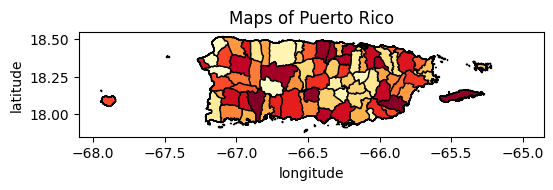

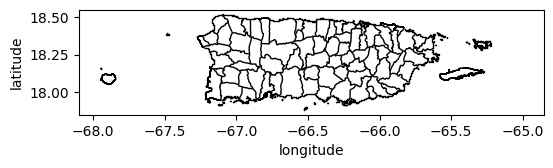

In [20]:
#prC0.plot()
fig, ax = plt.subplots(1, figsize=(6,10))
prC0.plot(ax=ax,legend=False,cmap='YlOrRd',k=5,
         edgecolor='black',linewidth=1) #

ax.title.set_text("Maps of Puerto Rico")
ax.set_xlabel('''longitude''')
ax.set_ylabel('''latitude''')


fig1, ax = plt.subplots(1, figsize=(6,10))
prC1.plot(ax=ax,legend=False,cmap='YlOrRd',k=5,
         edgecolor='black',linewidth=1) #
ax.set_xlabel('''longitude''')
ax.set_ylabel('''latitude''')

#prC1.plot()

In [21]:
prC0.dtypes
prC0.head(1)
#prC0.head()
#prC0.tail()
#prC0.shape
#prC0.columns
#prC0.explore()

,0
ADM0_ES,object
ADM0_PCODE,object
ADM1_ES,object
ADM1_PCODE,object
geometry,geometry


,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_PCODE,geometry
0,Puerto Rico,PR,Añasco,PR06,"POLYGON ((-67.18903 18.26622, -67.18903 18.266..."


<Axes: >

Text(0.5, 413.21325623749766, 'longitude')

Text(20.097222222222214, 0.5, 'latitude')

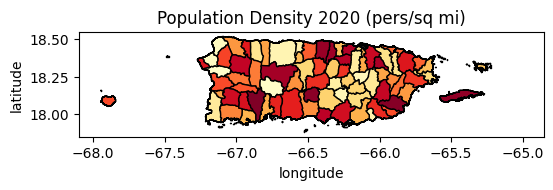

In [22]:
#your first thematic map! :) lets unpack options real quick esp fmt for dec pts; more later under 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))

prC0.plot(ax=ax,legend=False,cmap='YlOrRd',k=5,
         edgecolor='black',linewidth=1) #

#prC0.plot(ax=ax,column='ADM1_ES',legend=True,cmap='YlOrRd',k=5,
#         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
#        'loc':'best','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("Population Density 2020 (pers/sq mi)")
ax.set_xlabel('''longitude''')
ax.set_ylabel('''latitude''')

# I need to add the information contained on this website to my data: http://www.geo-ref.net/ph/pri.htm to give more specific details on the population density


In [30]:

mun = prC0.dissolve(by='ADM1_ES',aggfunc='sum').reset_index()
mun = mun[['ADM1_ES', 'ADM1_PCODE', 'geometry']]
#mun['ADM1_ES'] = mun['ADM1_ES'].str.upper()
#mun


Reviewing what information is available in the CSV documents

In [24]:

df_pop.columns




Index(['Geographic Area', 'Municipio', 'April 1, 2020 Estimates Base', '2020',
       '2021', '2022', '2023'],
      dtype='object')

In [25]:

population = df_pop.groupby('Municipio')['2020'].sum().reset_index()
population['Municipio'] = population['Municipio'].str.upper()
population.rename(columns= {'Municipio':'MUNICIPIO'}, inplace=True)
population.rename(columns= {'municipio':'MUNICIPIO'}, inplace=True)


In [26]:

df_unemployment.columns




Index(['Municipio', '8/1/2020', '7/1/2020', '6/1/2020', '5/1/2020', '4/1/2020',
       '3/1/2020', '2/1/2020', '1/1/2020', '12/1/2019',
       ...
       '12/1/1990', '11/1/1990', '10/1/1990', '9/1/1990', '8/1/1990',
       '7/1/1990', '6/1/1990', '5/1/1990', '4/1/1990', '3/1/1990'],
      dtype='object', length=367)

In [27]:

df_gen.columns


Index(['Municipio', 'Año', 'Tasa de desempleo (por ciento)', 'Color',
       'Población de 65000 o más', 'Población ',
       'Tasa de participación laboral (por ciento)', 'Mediana de ingreso',
       'Población femenina (por ciento)',
       'Casados (por ciento de 15 años o más)',
       'Solteros (por ciento de  15 años o más)',
       'Población de 5-17 años (por ciento)',
       'Población de 5 años (por ciento)',
       'Mediana de valor de vivienda (miles de $)',
       'Viviendas alquiladas (por ciento)', 'Años de escolaridad (mediana)',
       'Promedio de ingreso familiar',
       'Familias bajo el nivel de pobreza (por ciento)',
       'Vivienda inadecuada (por ciento)', 'Población urbana (por ciento)'],
      dtype='object')